Program Assignment 1 Machine Learning

Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.

We are given a dataset of student grades originating from different schools. The data collected ranges from the gender and age of the student to their frequency of absences alongside their grades. As most of the data is continuous, we will use regression to solve our problem of _______________________.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


### Load Dataset

In [5]:
url = "https://raw.githubusercontent.com/HansJoachimW/AFL1-MachineLearning/main/Student%20Grade%20-%20Dataset.csv"
dataset = pd.read_csv(url)
dataset.sample(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
111     GP   F   16       R     GT3       T     3     3  services     other   
114     GP   M   15       R     GT3       T     2     1    health  services   
159     GP   M   16       U     GT3       T     3     3     other  services   
259     GP   F   17       U     LE3       T     2     2  services  services   
220     GP   F   17       R     GT3       T     2     1   at_home  services   
304     GP   M   19       U     GT3       T     3     3     other     other   
269     GP   F   18       R     GT3       T     2     1     other     other   
162     GP   M   16       U     LE3       T     1     2     other     other   
358     MS   M   18       U     LE3       T     1     1     other  services   
323     GP   F   17       U     GT3       T     3     1  services  services   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
111  ...      4        1      2     1     1      2        0   7  10  10  
114  ...      5        4      2     1     1      5        8   9   9   9  
159  ...      4        5      5     4     4      5        4  10  12  12  
259  ...      3        4      1     1     1      2        0  10   9   0  
220  ...      4        2      5     1     2      5        2   6   6   6  
304  ...      4        4      4     1     1      3       20  15  14  13  
269  ...      4        3      5     1     2      3        0   6   0   0  
162  ...      4        4      4     2     4      5        0   7   0   0  
358  ...      3        3      2     1     2      3        4  10  10  10  
323  ...      3        4      3     2     3      5        1  12  14  15  

[10 rows x 33 columns]

### Preprocessing Data

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['school'] = le.fit_transform(dataset['school'].values)
dataset['sex'] = le.fit_transform(dataset['sex'].values)
dataset['address'] = le.fit_transform(dataset['address'].values)
dataset['famsize'] = le.fit_transform(dataset['famsize'].values)
dataset['Pstatus'] = le.fit_transform(dataset['Pstatus'].values)
dataset['Mjob'] = le.fit_transform(dataset['Mjob'].values)
dataset['Fjob'] = le.fit_transform(dataset['Fjob'].values)
dataset['reason'] = le.fit_transform(dataset['reason'].values)
dataset['guardian'] = le.fit_transform(dataset['guardian'].values)
dataset['schoolsup'] = le.fit_transform(dataset['schoolsup'].values)
dataset['famsup'] = le.fit_transform(dataset['famsup'].values)
dataset['paid'] = le.fit_transform(dataset['paid'].values)
dataset['activities'] = le.fit_transform(dataset['activities'].values)
dataset['nursery'] = le.fit_transform(dataset['nursery'].values)
dataset['higher'] = le.fit_transform(dataset['higher'].values)
dataset['internet'] = le.fit_transform(dataset['internet'].values)
dataset['romantic'] = le.fit_transform(dataset['romantic'].values)

dataset.head(n=10)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   
5       0    1   16        1        1        1     4     3     3     2  ...   
6       0    1   16        1        1        1     2     2     2     2  ...   
7       0    0   17        1        0        0     4     4     2     4  ...   
8       0    1   15        1        1        0     3     2     3     2  ...   
9       0    1   15        1        0        1     3     4     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  
5       5         4      2     1     2       5        10  15  15  15  
6       4         4      4     1     1       3         0  12  12  11  
7       4         1      4     1     1       1         6   6   5   6  
8       4         2      2     1     1       1         0  16  18  19  
9       5         5      1     1     1       5         0  14  15  15  

[10 rows x 33 columns]

### Checking NaN Data

In [7]:
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Exploratory Data Analysis (Univariate)

In [8]:
# Display the Univariate Data Characteristics 
dataset.describe()

school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob  ...      famrel  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     2.749367    2.521519    2.169620    2.281013  ...    3.944304   
std      1.094735    1.088201    1.227473    0.863542  ...    0.896659   
min      0.000000    0.000000    0.000000    0.000000  ...    1.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    4.000000   
50%      3.000000    2.000000    2.000000    2.000000  ...    4.000000   
75%      4.000000    3.000000    3.000000    3.000000  ...    5.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.235443    3.108861    1.481013    2.291139    3.554430    5.708861   
std      0.998862    1.113278    0.890741    1.287897    1.390303    8.003096   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      3.000000    2.000000    1.000000    1.000000    3.000000    0.000000   
50%      3.000000    3.000000    1.000000    2.000000    4.000000    4.000000   
75%      4.000000    4.000000    2.000000    3.000000    5.000000    8.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000   75.000000   

               G1          G2          G3  
count  395.000000  395.000000  395.000000  
mean    10.908861   10.713924   10.415190  
std      3.319195    3.761505    4.581443  
min      3.000000    0.000000    0.000000  
25%      8.000000    9.000000    8.000000  
50%     11.000000   11.000000   11.000000  
75%     13.000000   13.000000   14.000000  
max     19.000000   19.000000   20.000000  

[8 rows x 33 columns]

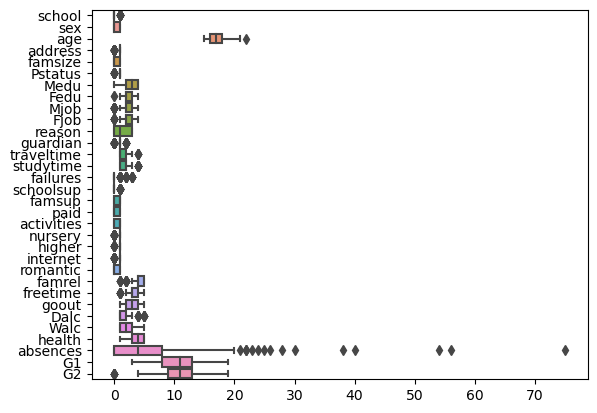

In [9]:
# Display Graphical Univariate EDA using box plot to analyze data distribution
sns.boxplot(data=dataset.drop(columns=['G3']), orient='h')
plt.show()

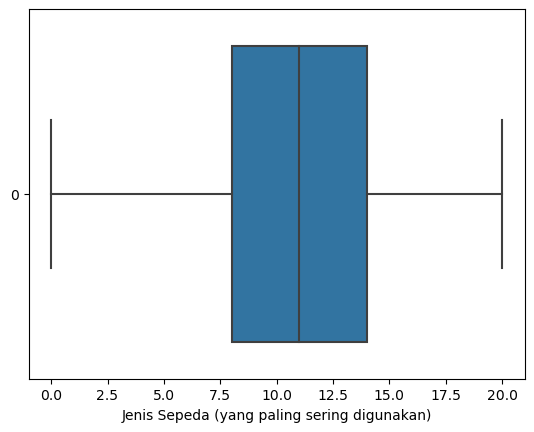

In [10]:
# Display a separate boxplot for 'G3' 
sns.boxplot(data=dataset["G3"],orient="h")
plt.xlabel('Jenis Sepeda (yang paling sering digunakan)')
plt.show()

### Exploratory Data Analysis (Multivariate)

In [11]:
# Display the Multivariate EDA using pair plot
sns.pairplot(data=dataset, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

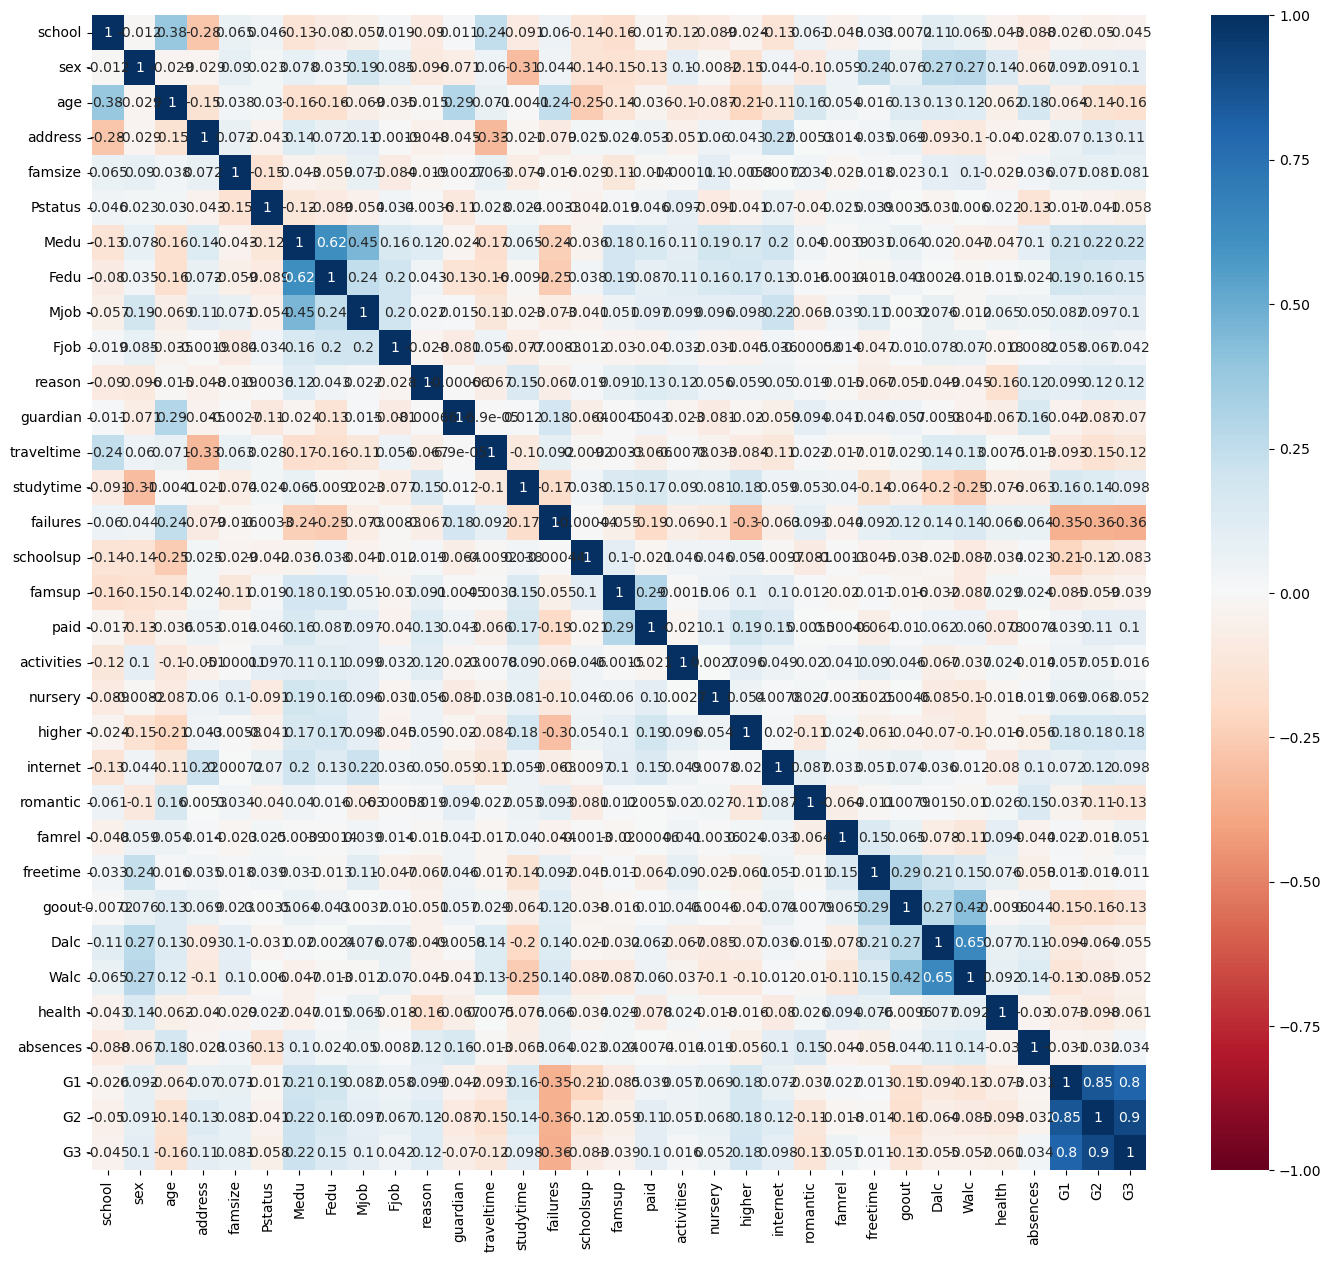

In [12]:
# Display the correlation strength and direction using heatmap
plt.subplots(figsize=(17,15))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

### Deciding The Independent And Dependent Variable

In [13]:
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

### Split The Dataset To Training Data dan Test Data
Train test split is a model validation process that allows you to simulate how your model would perform with new data.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
#Standard Scaler need to be used when the scale are different
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Create The Regression Model Based On The Training Data

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


print("Intercept: {:0.4f}".format(regressor.intercept_))
print("Coefficient b1: {:0.4f}".format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))
print("Coefficient b4: {:0.4f}".format(regressor.coef_[3]))
print("Coefficient b5: {:0.4f}".format(regressor.coef_[4]))
print("Coefficient b6: {:0.4f}".format(regressor.coef_[5]))
print("Coefficient b7: {:0.4f}".format(regressor.coef_[6]))
print("Coefficient b8: {:0.4f}".format(regressor.coef_[7]))
print("Coefficient b9: {:0.4f}".format(regressor.coef_[8]))
print("Coefficient b10: {:0.4f}".format(regressor.coef_[9]))
print("Coefficient b11: {:0.4f}".format(regressor.coef_[10]))
print("Coefficient b12: {:0.4f}".format(regressor.coef_[11]))
print("Coefficient b13: {:0.4f}".format(regressor.coef_[12]))
print("Coefficient b14: {:0.4f}".format(regressor.coef_[13]))
print("Coefficient b15: {:0.4f}".format(regressor.coef_[14]))
print("Coefficient b16: {:0.4f}".format(regressor.coef_[15]))
print("Coefficient b17: {:0.4f}".format(regressor.coef_[16]))
print("Coefficient b18: {:0.4f}".format(regressor.coef_[17]))
print("Coefficient b19: {:0.4f}".format(regressor.coef_[18]))
print("Coefficient b20: {:0.4f}".format(regressor.coef_[19]))
print("Coefficient b21: {:0.4f}".format(regressor.coef_[20]))
print("Coefficient b22: {:0.4f}".format(regressor.coef_[21]))
print("Coefficient b23: {:0.4f}".format(regressor.coef_[22]))
print("Coefficient b24: {:0.4f}".format(regressor.coef_[23]))
print("Coefficient b25: {:0.4f}".format(regressor.coef_[24]))
print("Coefficient b26: {:0.4f}".format(regressor.coef_[25]))
print("Coefficient b27: {:0.4f}".format(regressor.coef_[26]))
print("Coefficient b28: {:0.4f}".format(regressor.coef_[27]))
print("Coefficient b29: {:0.4f}".format(regressor.coef_[28]))
print("Coefficient b30: {:0.4f}".format(regressor.coef_[29]))
print("Coefficient b31: {:0.4f}".format(regressor.coef_[30]))
print("Coefficient b32: {:0.4f}".format(regressor.coef_[31]))

print('\nRegression Equation: y= {:0.4f} X1 + {:0.4f} X2 + {:0.4f} X3 + {:0.4f} X4 + {:0.4f} X5 + {:0.4f} X6 + {:0.4f} X7 + {:0.4f} X8 + {:0.4f} X9 + {:0.4f} X10 + {:0.4f} X11 + {:0.4f} X12 + {:0.4f} X13 + {:0.4f} X14 + {:0.4f} X15 + {:0.4f} X16 + {:0.4f} X17 + {:0.4f} X18 + {:0.4f} X19 + {:0.4f} X20 + {:0.4f} X21 + {:0.4f} X22 + {:0.4f} X23 + {:0.4f} X24 + {:0.4f} X25 + {:0.4f} X26 + {:0.4f} X27 + {:0.4f} X28 + {:0.4f} X29 + {:0.4f} X30 + {:0.4f} X31 + {:0.4f} X32'
      .format(regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4], regressor.coef_[5], regressor.coef_[6], regressor.coef_[7], regressor.coef_[8], regressor.coef_[9], regressor.coef_[10], regressor.coef_[11], regressor.coef_[12], regressor.coef_[13], regressor.coef_[14], regressor.coef_[15], regressor.coef_[16], regressor.coef_[17], regressor.coef_[18], regressor.coef_[19], regressor.coef_[20], regressor.coef_[21], regressor.coef_[22], regressor.coef_[23], regressor.coef_[24], regressor.coef_[25], regressor.coef_[26], regressor.coef_[27], regressor.coef_[28], regressor.coef_[29], regressor.coef_[30], regressor.coef_[31], regressor.intercept_))

# Find the Coefficient of Determination
r_square = regressor.score(X_train, y_train)
print('\nThe Coefficient of Determination: {:0.4f}'.format(r_square))

Intercept: 10.4747
Coefficient b1: 0.2049
Coefficient b2: 0.1036
Coefficient b3: -0.3307
Coefficient b4: 0.0136
Coefficient b5: 0.0857
Coefficient b6: -0.0347
Coefficient b7: 0.1938
Coefficient b8: -0.2280
Coefficient b9: -0.0200
Coefficient b10: 0.0452
Coefficient b11: -0.0231
Coefficient b12: -0.0077
Coefficient b13: 0.0252
Coefficient b14: 0.0255
Coefficient b15: -0.1478
Coefficient b16: 0.1992
Coefficient b17: 0.0464
Coefficient b18: 0.1057
Coefficient b19: -0.1765
Coefficient b20: -0.1268
Coefficient b21: 0.0404
Coefficient b22: -0.1032
Coefficient b23: -0.1333
Coefficient b24: 0.2167
Coefficient b25: -0.0237
Coefficient b26: 0.0048
Coefficient b27: -0.1701
Coefficient b28: 0.1710
Coefficient b29: 0.1612
Coefficient b30: 0.4659
Coefficient b31: 0.4538
Coefficient b32: 3.5714

Regression Equation: y= 0.2049 X1 + 0.1036 X2 + -0.3307 X3 + 0.0136 X4 + 0.0857 X5 + -0.0347 X6 + 0.1938 X7 + -0.2280 X8 + -0.0200 X9 + 0.0452 X10 + -0.0231 X11 + -0.0077 X12 + 0.0252 X13 + 0.0255 X14 + -0.14

### Test The Predicted Value Using Test Data

In [31]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

y_test     y_pred
0      14  14.243208
1      10  10.675614
2       9   9.151399
3      15  15.251887
4      16  16.491889

### Evaluating the Model Fit using RMSE

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2.3760
MAE: 1.55
MSE: 5.65


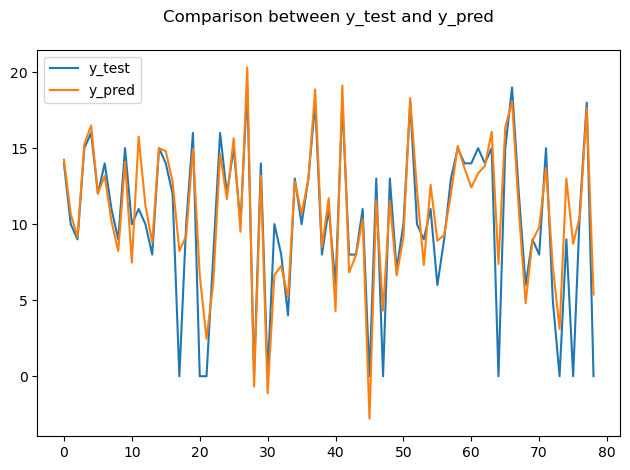

In [19]:
# Visualize the comparison between y_test and y_pred to depict the error margin
evaluate.plot(kind='line')
plt.title('Comparison between y_test and y_pred', pad=20)
plt.tight_layout()
plt.show()

# Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

## 2 Degree

### Training Process

In [37]:
# Two Degree Polynomial
poly = PolynomialFeatures(degree = 2)
train_x_poly2 = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
train_y_poly2 = clf.fit(train_x_poly2, y_train)

# get coefcient and intercept
print('coeficients', clf.coef_)
print('intercept', clf.intercept_)


coeficients [ 3.49542542e-04  3.56041754e-02  3.22293164e-02 -3.64474392e-01
  4.87003662e-02  3.28311294e-03 -1.44648866e-02  3.61077449e-01
 -9.45143240e-03 -1.52831945e-01  9.93359645e-02 -2.14227674e-01
 -2.87050825e-01 -6.02139499e-02 -1.51181659e-02 -3.11089148e-01
  1.98356910e-02 -1.52818010e-01  1.27986443e-01 -2.31323839e-01
 -6.57835512e-02  1.12046288e-02  4.15690480e-03 -4.56473884e-02
  1.82210169e-01 -1.45998177e-01  7.48716442e-02 -1.64711869e-01
  8.19602165e-02  4.34359435e-02  5.02890910e-01  1.16156460e+00
  1.57737639e+00  7.13386008e-02 -3.57687980e-02  1.77987142e-01
  2.40901635e-01 -6.52569231e-02  9.47065483e-02  2.17987363e-01
 -3.27387591e-02 -4.54754164e-02  2.21972763e-02  1.07980796e-01
  2.43940944e-01  1.90152536e-02 -1.33713842e-01 -5.68510193e-02
 -2.55204576e-02 -6.02132383e-02  6.35267195e-02  1.94467424e-01
  6.38307197e-02 -1.68577789e-01 -7.12082740e-02 -8.78965374e-02
 -1.09002022e-01 -2.96061577e-02  1.39851426e-01 -3.02406506e-02
  1.62837324e

### Test Model

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Two Degree Model
test_x_poly2 = poly.fit_transform(X_test)
test_y_poly2 = clf.predict(test_x_poly2)

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(test_y_poly2, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(test_y_poly2, y_pred))
print('MSE: %.2f' % mean_squared_error(test_y_poly2, y_pred))

Root Mean Squared Error (RMSE): 4.7619
MAE: 3.02
MSE: 22.68


## 3 Degree

### Training Process

In [23]:
# Three Degree Polynomial
poly = PolynomialFeatures(degree = 3)
train_x_poly3 = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
train_y_poly3 = clf.fit(train_x_poly3, y_train)

# get coefcient and intercept
print('coeficients', clf.coef_)
print('intercept', clf.intercept_)

coeficients [-0.00010867  0.00329171  0.00985325 ...  0.05657633  0.06597503
  0.10601022]
intercept 10.26878626526422


### Test Model

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Two Degree Model
test_x_poly3 = poly.fit_transform(X_test)
test_y_poly3 = clf.predict(test_x_poly3)

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(test_y_poly3, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(test_y_poly3, y_pred))
print('MSE: %.2f' % mean_squared_error(test_y_poly3, y_pred))

Root Mean Squared Error (RMSE): 4.2554
MAE: 2.67
MSE: 18.11


# Support Vector Regression

In [44]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [45]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

y_test     y_pred
0      14  13.624840
1      10  11.673982
2       9   9.598154
3      15  14.515231
4      16  15.891043

In [46]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 3.5329
MAE: 2.28
MSE: 12.48


# Decision Tree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor
 
# Create a decision tree regression model
model = DecisionTreeRegressor()
 
# Fit the model to the data
model.fit(X_train, y_train)
 
# Predict the response for a new data point
y_pred = model.predict(X_test)

In [43]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2.8684
MAE: 1.57
MSE: 8.23


# Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
 
# Create a random forest regression model
model = RandomForestRegressor(n_estimators=100)
 
# Fit the model to the data
model.fit(X_train, y_train)
 
# Predict the response for a new data point
y_pred = model.predict(X_test)

In [49]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.8007
MAE: 1.10
MSE: 3.24


In [57]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(oob_score=True)
RandomForest.fit(X_train,y_train)
print(RandomForest.oob_score_)

0.8652131643478898
